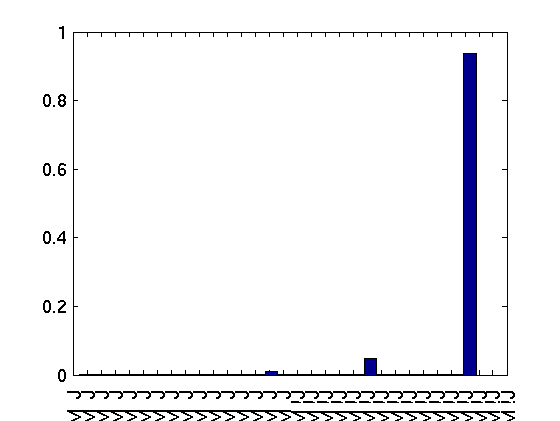

ans = 

           Brut         Smart  
         _________    _________

    C        0.001        0.001
    T        0.002        0.002
    A    0.0025164    0.0025164
    M     0.052139     0.052139
    J     0.011736     0.011736


In [2]:
C=1; T=2; A=3; M=4; J=5;
names = ['C' 'T' 'A' 'M' 'J'];
VRAI = 1; FAUX = 2;

pCond{C} = reshape([0.001 0.999],2,1);  % C
pCond{T} = reshape([0.002 0.998],2,1);  % T
pCond{A} = reshape([0.95 0.29 0.94 0.001 0.05 0.71 0.06 0.999],2,2,2);  % C T A
pCond{M} = reshape([0.90 0.05 0.10 0.95],2,2);   % A M
pCond{J} = reshape([0.70 0.01 0.30 0.99],2,2);   % A J

pJointe = @(e) ( pCond{C}(e(C)) ...
               * pCond{T}(e(T)) ...
               * pCond{A}(e(C),e(T),e(A)) ...
               * pCond{M}(e(A),e(M)) ...
               * pCond{J}(e(A),e(J)) );


%% Proba Jointe                   
[probaJointe Omega] = computeProba(pJointe, [0 0 0 0 0]);


%% Histogramme
smartBar(probaJointe, Omega, names);


In [5]:
%% Proba Marginales
p1 = computeMarginal(pJointe, [VRAI 0 0 0 0], [0 0 0 VRAI FAUX])
p2 = computeMarginal(pJointe, [VRAI 0 0 0 0], [0 0 0 FAUX VRAI])
p3 = computeMarginal(pJointe, [VRAI 0 0 0 0], [0 0 0 VRAI VRAI])
p4 = computeMarginal(pJointe, [VRAI 0 0 0 0], [0 0 0 FAUX FAUX])
p4b= computeMarginal(pJointe, [FAUX 0 0 0 0], [0 0 0 FAUX FAUX])

p5 = computeMarginal(pJointe, [VRAI 0 0 0 0], [0 0 0 VRAI 0])
p6 = computeMarginal(pJointe, [VRAI 0 0 0 0], [0 0 0 0 VRAI])



p1 =

    0.0051


p2 =

    0.0069


p3 =

    0.2842


p4 =

   9.0184e-05


p4b =

    0.9999


p5 =

    0.0163


p6 =

    0.0561


In [6]:
%% Proba Inconditionnelles
pCb = sum(computeProba(pJointe, [VRAI 0 0 0 0]));
pTb = sum(computeProba(pJointe, [0 VRAI 0 0 0]));
pAb = sum(computeProba(pJointe, [0 0 VRAI 0 0]));
pMb = sum(computeProba(pJointe, [0 0 0 VRAI 0]));
pJb = sum(computeProba(pJointe, [0 0 0 0 VRAI]));

% On peut aussi calculer ces probabilités de manières plus intelligente:
pC = pCond{C}(VRAI);
pT = pCond{T}(VRAI);
pA = ( pCond{A}(VRAI,VRAI,VRAI)*pC*pT       ...
     + pCond{A}(FAUX,VRAI,VRAI)*(1-pC)*pT   ...
     + pCond{A}(VRAI,FAUX,VRAI)*pC*(1-pT)   ...
     + pCond{A}(FAUX,FAUX,VRAI)*(1-pC)*(1-pT) );
pM = ( pCond{M}(VRAI,VRAI)*pA + pCond{M}(FAUX,VRAI)*(1-pA) );
pJ = ( pCond{J}(VRAI,VRAI)*pA + pCond{J}(FAUX,VRAI)*(1-pA) );

% Comparaison
Brut = [pCb pTb pAb pMb pJb]';
Smart = [pC pT  pA  pM  pJ]';
table(Brut, Smart, 'RowNames', num2cell(names'))

ans = 

           Brut         Smart  
         _________    _________

    C        0.001        0.001
    T        0.002        0.002
    A    0.0025164    0.0025164
    M     0.052139     0.052139
    J     0.011736     0.011736
